In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [35]:
data = pd.read_csv('NPHA-doctor-visits.csv')

In [11]:
data.head()

,Number of Doctors Visited,Age,Phyiscal Health,Mental Health,Dental Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Race,Gender
0,3,2,4,3,3,3,0,0,0,0,1,2,3,1,2
1,2,2,4,2,3,3,1,0,0,1,0,3,3,1,1
2,3,2,3,2,3,3,0,0,0,0,1,3,3,4,1
3,1,2,3,2,3,3,0,0,0,1,0,3,3,4,2
4,3,2,3,3,3,3,1,0,0,0,0,2,3,1,2


In [13]:
# Preprocess (encoding, handling missing values, etc.)
data.replace(-1, pd.NA, inplace=True)
data.dropna(inplace=True)  # or impute values as needed

In [17]:
# Encode target variable
data['Target'] = data['Number of Doctors Visited'].map({1: 0, 2: 1, 3: 2})

In [19]:
# Split features and target
X = data.drop(columns=['Number of Doctors Visited', 'Target'])
y = data['Target']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Train a Random Forest model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
# Make predictions
y_pred = clf.predict(X_test)

In [27]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.4857142857142857
Classification Report:
               precision    recall  f1-score   support

           0       0.08      0.04      0.06        23
           1       0.57      0.78      0.66        74
           2       0.35      0.21      0.26        43

    accuracy                           0.49       140
   macro avg       0.33      0.35      0.33       140
weighted avg       0.42      0.49      0.44       140



In [29]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)


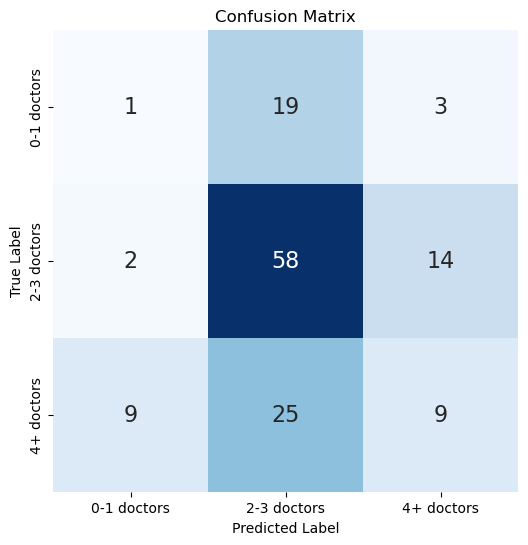

In [31]:
# Plot confusion matrix as a bar chart
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16}, xticklabels=["0-1 doctors", "2-3 doctors", "4+ doctors"], yticklabels=["0-1 doctors", "2-3 doctors", "4+ doctors"])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()